In [ ]:
#q1 Linear Regression because we are plotting a trendline which
# means that we are predicting specific values compared to classifying 
# them into categories

In [ ]:
#q2 Regression

In [ ]:
#q3 Classification

In [ ]:
#q4 Skewed data

In [ ]:
#q5 Square because of the 11 nearest neightboring points to our green one,
# there is 6 squares and 5 triangles meaning that there is a higher probability
# of the green circle classifying as a square

In [ ]:
#q6 unsupervised machine leanring

In [2]:
import pandas as pd
import seaborn as sns
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
BC_data=pd.read_csv("BreastCancer_data.csv")
BC_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


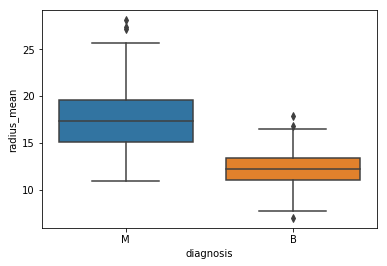

In [4]:
box = sns.boxplot(x=BC_data["diagnosis"],y=BC_data["radius_mean"])
box

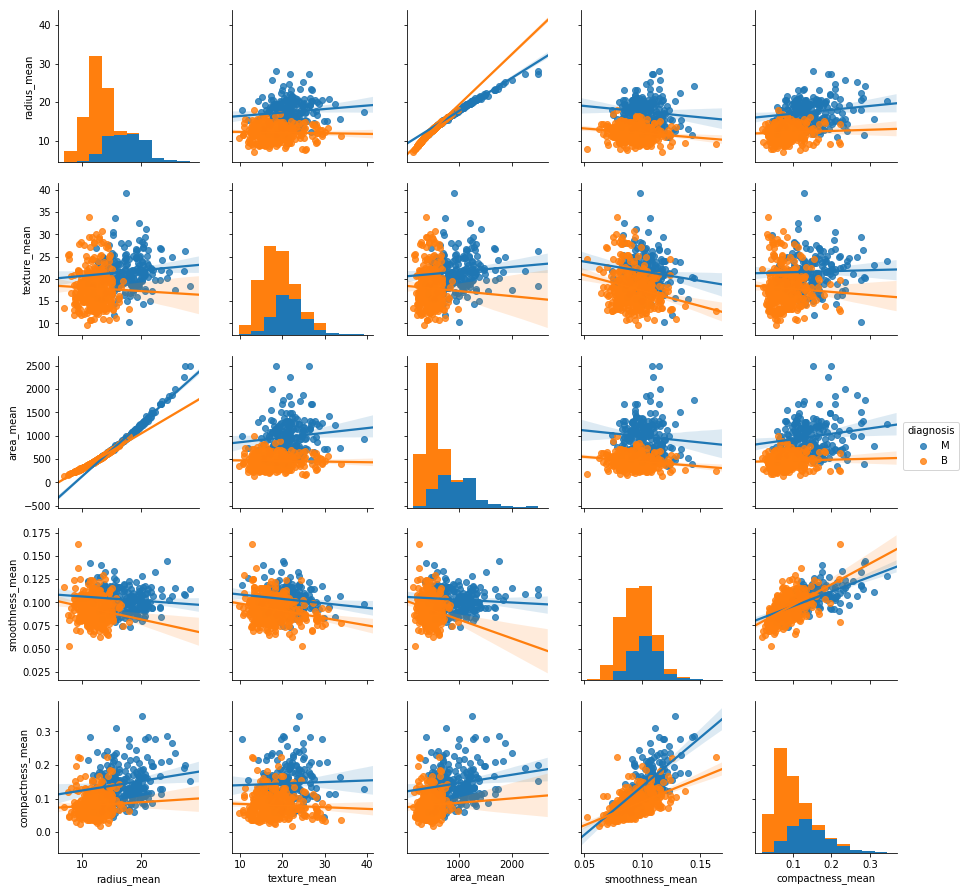

In [5]:
sns.pairplot(data=BC_data.loc[:,["radius_mean","texture_mean","area_mean","smoothness_mean","compactness_mean","diagnosis"]],hue="diagnosis",kind="reg")

In [6]:
b_data = BC_data.loc[BC_data["diagnosis"]=='B',:]
b_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN


In [7]:
m_data = BC_data.loc[BC_data["diagnosis"]=='M',:]
m_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
f=figure(title="Benign and Malignant Smoothness(Y) by Compactness(X) with size by Radius")

In [9]:
f.circle(b_data["compactness_mean"],b_data["smoothness_mean"],size=b_data["radius_mean"],alpha=0.3,color='green',legend="Benign")
f.triangle(m_data["compactness_mean"],m_data["smoothness_mean"],size=m_data["radius_mean"],color='red',legend="Malignant")
f.legend.location='top_left'
show(f)

In [142]:
X = BC_data.loc[:,["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concavepoints_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concavepoints_worst","symmetry_worst","fractal_dimension_worst"]]
Xs = BC_data.loc[:,["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean"]]

Y = BC_data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X: ", X.shape)
print("Xs: ", Xs.shape)
print("Y: ", Y.shape)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train(X): ",y_train.shape)
print("y_test(X): ",y_test.shape)
X_train
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.2, random_state=1)
print("Xs_train: ", X_train.shape)
print("Xs_test: ", X_test.shape)
print("y(Xs)_train(X): ",y_train.shape)
print("y(Xs)_test: ",y_test.shape)


X:  (569, 30)
Xs:  (569, 6)
Y:  (569,)
X_train:  (455, 30)
X_test:  (114, 30)
y_train(X):  (455,)
y_test(X):  (114,)
Xs_train:  (455, 6)
Xs_test:  (114, 6)
y(Xs)_train(X):  (455,)
y(Xs)_test:  (114,)


C:\Users\Shiffy46\Anaconda3\DS201\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [143]:
#******* X example SHOULD work but data is messed up

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_logReg=metrics.accuracy_score(y_test, y_pred)
print("Accuracy from X: ",accuracy_logReg)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [144]:
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_logReg=metrics.accuracy_score(y_test, y_pred)
print("Accuracy from Xs: ",accuracy_logReg)

Accuracy from Xs:  0.9298245614035088


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_prediction=knn.predict(X_test)
accuracy_knn=metrics.accuracy_score(y_prediction,y_test)
print("Accuracy from X: ",accuracy_knn)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [146]:
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.2,random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_prediction=knn.predict(X_test)
accuracy_knn=metrics.accuracy_score(y_prediction,y_test)
print("Accuracy from Xs: ",accuracy_knn)

Accuracy from Xs:  0.8508771929824561


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
scores = []
i_range = list(range(1,25))
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_prediction=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_prediction,y_test))

plt.plot(i_range,scores)
plt.title("sample ofk1-k25 plot of X (30 features)")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Text(0.5,1,'sample ofk1-k25 plot of Xs (6 features)')

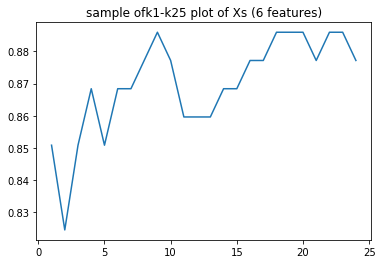

In [148]:
#******* this is the Xs iteration THIS WORKS but X doesn't due 
#******* to the data having null because the column names are 
#******* screwed up


X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.2,random_state=1)
scores = []
i_range = list(range(1,25))
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_prediction=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_prediction))
plt.plot(i_range,scores)
plt.title("sample ofk1-k25 plot of Xs (6 features)")